# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

## American Community Survey
<img src="../img/Mountains2.jpg" width="700" height="200" />




In [6]:
import requests
import pandas as pd
from tabulate import tabulate
from datetime import date
#import censusdata
from pathlib import Path
import censusFunctions as cf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from decouple import config
import os
import re
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
counties = ['Adams',  'Alamosa',  'Arapahoe',  'Archuleta',  'Baca',  'Bent', 'Boulder', 
            'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos', 'Costilla', 
            'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores', 'Douglas', 'Eagle', 'Elbert', 
            'El Paso', 'Fremont', 'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 
            'Huerfano', 'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 
            'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat', 
            'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips', 
            'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt', 'Saguache', 
            'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller', 'Washington', 
            'Weld', 'Yuma', 'Total'] 

months = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
          'July': 7,'August': 8, 'September': 9,'October': 10,'November': 11,'December': 12}

---
## American Community Survey 2018

### Load Dataframe

In [8]:
# Read the raw data in here.
base_df_fn =  "/home/jdreed/MSDS696/data/raw/ACSDP5Y2018.DP02.xlsx"

# Read all rows and all columns .
df = pd.read_excel(base_df_fn, sheet_name=0, header = 0, index_col = None, skiprows = 0)
base_df = df.copy(deep=True)


# Lets cleanup the County names.  There a bit too long.
base_df.iloc[:,1] = [re.sub('\sCounty, Colorado','',c) for c in  base_df.iloc[:,1]]
base_df.drop(columns= 'GEO_ID', inplace= True)

base_df.rename(columns={'NAME': 'county'}, inplace=True)

margin_cols = [c for c in base_df.columns if re.search('M$',c)]

print(f'BEFORE removing margin fields: bdf.shape: {base_df.shape}')

# We remove margin fields
base_df.drop(columns= margin_cols, axis = 1, inplace = True)
print(f'AFTER removing margin fields: bdf.shape: {base_df.shape}')

pd.set_option('display.max_rows', base_df.shape[0]+1)
base_df

BEFORE removing margin fields: bdf.shape: (65, 609)
AFTER removing margin fields: bdf.shape: (65, 305)


,county,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,...,DP02_0148E,DP02_0148PE,DP02_0149E,DP02_0149PE,DP02_0150E,DP02_0150PE,DP02_0151E,DP02_0151PE,DP02_0152E,DP02_0152PE
0,Adams,164353,164353,116273,70.7,58021,35.3,83504,50.8,40084,...,2711,0.5,507,0.1,164353,164353,151894,92.4,134902,82.1
1,Alamosa,6153,6153,3474,56.5,1655,26.9,2701,43.9,1268,...,144,0.9,0,0.0,6153,6153,5215,84.8,4428,72.0
2,Arapahoe,237559,237559,157078,66.1,73655,31.0,118050,49.7,52930,...,4887,0.8,1646,0.3,237559,237559,224794,94.6,209566,88.2
3,Archuleta,5670,5670,3710,65.4,988,17.4,3170,55.9,793,...,200,1.5,102,0.8,5670,5670,5197,91.7,4596,81.1
4,Baca,1642,1642,1038,63.2,370,22.5,853,51.9,267,...,19,0.5,9,0.3,1642,1642,1322,80.5,1140,69.4
5,Bent,1744,1744,1171,67.1,541,31.0,894,51.3,365,...,24,0.4,0,0.0,1744,1744,1430,82.0,1282,73.5
6,Boulder,125894,125894,73589,58.5,33113,26.3,59037,46.9,24775,...,3770,1.2,295,0.1,125894,125894,120276,95.5,112827,89.6
7,Broomfield,26721,26721,17498,65.5,8318,31.1,14950,55.9,6954,...,659,1.0,192,0.3,26721,26721,25879,96.8,24651,92.3
8,Chaffee,7958,7958,5259,66.1,1633,20.5,4419,55.5,1143,...,201,1.0,0,0.0,7958,7958,7051,88.6,6496,81.6
9,Cheyenne,742,742,484,65.2,228,30.7,398,53.6,193,...,10,0.5,0,0.0,742,742,636,85.7,590,79.5


In [9]:
58021/164353

0.3530267168837806

In [10]:
display(base_df.describe())

,DP02_0001E,DP02_0001PE,DP02_0002E,DP02_0002PE,DP02_0003E,DP02_0003PE,DP02_0004E,DP02_0004PE,DP02_0005E,DP02_0005PE,...,DP02_0148E,DP02_0148PE,DP02_0149E,DP02_0149PE,DP02_0150E,DP02_0150PE,DP02_0151E,DP02_0151PE,DP02_0152E,DP02_0152PE
count,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,65.000000,65.000000,6.500000e+01,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,6.500000e+01,65.000000,6.500000e+01,65.000000
mean,6.502729e+04,6.502729e+04,4.159025e+04,63.890769,18483.630769,23.980000,3.230877e+04,51.467692,13457.846154,17.226154,...,1460.092308,0.898462,269.261538,0.107692,6.502729e+04,6.502729e+04,6.037720e+04,88.332308,5.572794e+04,78.889231
std,2.665892e+05,2.665892e+05,1.702992e+05,6.084117,75865.634617,6.274308,1.321968e+05,6.486310,55230.685970,5.244887,...,5978.144972,0.569126,1136.342753,0.165178,2.665892e+05,2.665892e+05,2.476633e+05,6.288708,2.287137e+05,8.144383
min,2.660000e+02,2.660000e+02,1.190000e+02,44.700000,32.000000,10.100000,1.080000e+02,34.400000,19.000000,5.100000,...,0.000000,0.000000,0.000000,0.000000,2.660000e+02,2.660000e+02,2.310000e+02,68.300000,2.050000e+02,59.000000
25%,2.194000e+03,2.194000e+03,1.416000e+03,60.500000,475.000000,19.400000,1.246000e+03,47.300000,359.000000,13.900000,...,34.000000,0.500000,0.000000,0.000000,2.194000e+03,2.194000e+03,2.035000e+03,84.300000,1.723000e+03,73.600000
50%,6.153000e+03,6.153000e+03,3.602000e+03,64.500000,1358.000000,24.900000,2.810000e+03,50.900000,901.000000,16.900000,...,138.000000,0.800000,5.000000,0.000000,6.153000e+03,6.153000e+03,5.215000e+03,88.600000,4.596000e+03,79.500000
75%,1.716300e+04,1.716300e+04,1.165600e+04,67.400000,3808.000000,28.400000,9.307000e+03,55.500000,2828.000000,20.700000,...,410.000000,1.000000,50.000000,0.100000,1.716300e+04,1.716300e+04,1.498500e+04,93.800000,1.363000e+04,83.700000
max,2.113387e+06,2.113387e+06,1.351683e+06,78.700000,600718.000000,40.200000,1.050035e+06,67.700000,437380.000000,33.800000,...,47453.000000,3.000000,8751.000000,0.800000,2.113387e+06,2.113387e+06,1.962259e+06,98.000000,1.811158e+06,95.500000


## Data Dictionary

In [11]:
# Read the data dictionary.
base_df_fn =  "/home/jdreed/MSDS696/data/raw/ACSDP5Y2018.DP02.xlsx"

# Read all rows and all columns .
df = pd.read_excel(base_df_fn, sheet_name=2, header = 0, index_col = None, skiprows = 0)
meta_df = df.copy(deep=True)
#print(f'meta_df.shape {meta_df.shape}\n Column Names: {meta_df.columns}\n Meta_df.head(): {meta_df.head()}')

meta_df.set_index('GEO_ID',inplace= True)
meta_df.columns

meta_df.fillna(" ", axis = 1, inplace = True)

# Remove the margin fields.  We are ignoring these in this exercise.
margin_labels = [l for l in meta_df.index if re.search('M$',l)]
margin_labels

print(f'BEFORE removing margin fields: meta_df.shape: {meta_df.shape}')
meta_df = meta_df.drop(labels = margin_labels)
print(f'AFTER removing margin fields: meta_df.shape: {meta_df.shape}')

# Create dictionary of remaining fields.  We *MAY* need this later.
meta_dict = {k:v for k,v in zip(meta_df.index,meta_df['Description']) }
print(f'Number of entries in meta_dict: len(meta_dict) {len(meta_dict)}')

dd_df = pd.DataFrame.from_dict(meta_dict, orient = 'index')


from IPython.display import display
pd.set_option('display.max_rows', dd_df.shape[0]+1)
display(dd_df)

BEFORE removing margin fields: meta_df.shape: (608, 7)
AFTER removing margin fields: meta_df.shape: (304, 7)
Number of entries in meta_dict: len(meta_dict) 304


,0
DP02_0001E,Estimate_HOUSEHOLDS BY TYPE_Total households
DP02_0001PE,Percent Estimate_HOUSEHOLDS BY TYPE_Total hous...
DP02_0002E,Estimate_HOUSEHOLDS BY TYPE_Total households_F...
DP02_0002PE,Percent Estimate_HOUSEHOLDS BY TYPE_Total hous...
DP02_0003E,Estimate_HOUSEHOLDS BY TYPE_Total households_F...
DP02_0003PE,Percent Estimate_HOUSEHOLDS BY TYPE_Total hous...
DP02_0004E,Estimate_HOUSEHOLDS BY TYPE_Total households_F...
DP02_0004PE,Percent Estimate_HOUSEHOLDS BY TYPE_Total hous...
DP02_0005E,Estimate_HOUSEHOLDS BY TYPE_Total households_F...
DP02_0005PE,Percent Estimate_HOUSEHOLDS BY TYPE_Total hous...


## Create Dataset for Modeling

We will retain the **PE** (percent estimates) and eliminate the **E** features.

In [13]:
drop_cols = [c for c in base_df.columns if re.search('\dE$',c)]
print(f'Number of dropped columns: {len(drop_cols)}\n\nColumn Names: \n{drop_cols}')


Number of dropped columns: 152

Column Names: 
['DP02_0001E', 'DP02_0002E', 'DP02_0003E', 'DP02_0004E', 'DP02_0005E', 'DP02_0006E', 'DP02_0007E', 'DP02_0008E', 'DP02_0009E', 'DP02_0010E', 'DP02_0011E', 'DP02_0012E', 'DP02_0013E', 'DP02_0014E', 'DP02_0015E', 'DP02_0016E', 'DP02_0017E', 'DP02_0018E', 'DP02_0019E', 'DP02_0020E', 'DP02_0021E', 'DP02_0022E', 'DP02_0023E', 'DP02_0024E', 'DP02_0025E', 'DP02_0026E', 'DP02_0027E', 'DP02_0028E', 'DP02_0029E', 'DP02_0030E', 'DP02_0031E', 'DP02_0032E', 'DP02_0033E', 'DP02_0034E', 'DP02_0035E', 'DP02_0036E', 'DP02_0037E', 'DP02_0038E', 'DP02_0039E', 'DP02_0040E', 'DP02_0041E', 'DP02_0042E', 'DP02_0043E', 'DP02_0044E', 'DP02_0045E', 'DP02_0046E', 'DP02_0047E', 'DP02_0048E', 'DP02_0049E', 'DP02_0050E', 'DP02_0051E', 'DP02_0052E', 'DP02_0053E', 'DP02_0054E', 'DP02_0055E', 'DP02_0056E', 'DP02_0057E', 'DP02_0058E', 'DP02_0059E', 'DP02_0060E', 'DP02_0061E', 'DP02_0062E', 'DP02_0063E', 'DP02_0064E', 'DP02_0065E', 'DP02_0066E', 'DP02_0067E', 'DP02_0068E', 

#### Drop redundant columns from the Base Data Frame

Build new basis for modelling data.

In [14]:
model_df = base_df.drop(columns= drop_cols)
print(f'Model DataFrame: shape: {model_df.shape}')
model_df

Model DataFrame: shape: (65, 153)


,county,DP02_0001PE,DP02_0002PE,DP02_0003PE,DP02_0004PE,DP02_0005PE,DP02_0006PE,DP02_0007PE,DP02_0008PE,DP02_0009PE,...,DP02_0143PE,DP02_0144PE,DP02_0145PE,DP02_0146PE,DP02_0147PE,DP02_0148PE,DP02_0149PE,DP02_0150PE,DP02_0151PE,DP02_0152PE
0,Adams,164353,70.7,35.3,50.8,24.4,6.4,3.2,13.5,7.7,...,0.1,0.7,1.6,0.2,0.1,0.5,0.1,164353,92.4,82.1
1,Alamosa,6153,56.5,26.9,43.9,20.6,5.0,2.6,7.5,3.7,...,0.1,0.1,1.8,0.2,0.0,0.9,0.0,6153,84.8,72.0
2,Arapahoe,237559,66.1,31.0,49.7,22.3,5.4,2.6,11.0,6.1,...,0.1,2.3,2.0,0.4,0.5,0.8,0.3,237559,94.6,88.2
3,Archuleta,5670,65.4,17.4,55.9,14.0,3.7,0.6,5.9,2.8,...,0.0,0.2,2.5,0.2,0.3,1.5,0.8,5670,91.7,81.1
4,Baca,1642,63.2,22.5,51.9,16.3,4.4,2.3,6.9,4.0,...,0.0,0.1,0.9,0.1,0.0,0.5,0.3,1642,80.5,69.4
5,Bent,1744,67.1,31.0,51.3,20.9,4.3,3.3,11.6,6.8,...,0.1,0.0,1.4,0.0,0.0,0.4,0.0,1744,82.0,73.5
6,Boulder,125894,58.5,26.3,46.9,19.7,3.8,2.1,7.8,4.5,...,0.2,0.3,2.5,0.5,0.4,1.2,0.1,125894,95.5,89.6
7,Broomfield,26721,65.5,31.1,55.9,26.0,2.9,1.7,6.7,3.5,...,0.2,0.5,2.7,0.6,0.4,1.0,0.3,26721,96.8,92.3
8,Chaffee,7958,66.1,20.5,55.5,14.4,4.1,1.5,6.5,4.7,...,0.4,0.6,4.1,0.3,0.1,1.0,0.0,7958,88.6,81.6
9,Cheyenne,742,65.2,30.7,53.6,26.0,6.9,4.0,4.7,0.7,...,0.1,0.0,1.4,0.6,0.0,0.5,0.0,742,85.7,79.5


---
# Voter Registration General Election Results 1952 - 1980 & 2020

## Read Each of the VR Excel Workbooks, **Status** Tab
### Combine ALL into a Data Frame 

    County, Year, Month, Active, Inactive, Total

In [15]:
def get_xlsx_ncols(fn, sheet_idx = 0):
    import xlrd as xl
    loc = (fn)          #Giving the location of the file 
  
    wb = xl.open_workbook(loc)                   
    s1 = wb.sheet_by_index(sheet_idx)                    
    s1.cell_value(0,0)                           
  
    irows = s1.nrows 
    icols = s1.ncols
    #close(loc)
    return(icols)

from os import listdir
from os.path import isfile, join
vr_directory = '../data/raw/vr'

vr_files = [f for f in listdir(vr_directory) if isfile(join(vr_directory, f))]
len(vr_files)

# Define dataframe for status detail.
status_df = pd.DataFrame(columns = ['County', 'Date', 'Active', 'Inactive', 'Prereg', 'Total'] )
df5_columns = ['County', 'Active', 'Inactive', 'Prereg', 'Total']
df4_columns = ['County', 'Active', 'Inactive',           'Total']
print(status_df.columns)
print(status_df.shape)

Index(['County', 'Date', 'Active', 'Inactive', 'Prereg', 'Total'], dtype='object')
(0, 6)


In [16]:
%%time
records = []
# Some of the files have five fields instead of just four, so there is logic to open the files and count the number of 
for f, i in zip(vr_files, range(len(vr_files))):
    
    year = int(f.split('-')[1])
    month = int(f.split('-')[3].strip('.xlsx'))
    file_path = vr_directory + '/' + f
    if get_xlsx_ncols(file_path) >= 5:
        df_columns = df5_columns
    else:
        df_columns = df4_columns
        
    df = pd.read_excel(file_path, sheet_name=0, header = None, index_col = None, skiprows = 2, 
                       usecols = range(len(df_columns)), names = df_columns)
    #print(f'file_path: {file_path}')
    for r in range(df.shape[0]):
        if (df.iloc[r,0] != 'Total'):
            rec_dict = {'County': df.iloc[r,0], 'Date': date(year, month, 1)}
            add_dict = {key:value for key,value in zip(df_columns[1:], df.iloc[r,1:])}

            new_dict = {**rec_dict, **add_dict}
            #print(f'NEW: {new_dict}')
            records.append(new_dict)

CPU times: user 4min 3s, sys: 305 ms, total: 4min 3s
Wall time: 4min 3s


In [17]:
status_df = pd.DataFrame(data=records)
status_df['Date'] = pd.to_datetime(status_df['Date'])
status_df['Year'] = pd.DatetimeIndex(status_df['Date']).year

In [23]:
co_vr_status_df = status_df.copy(deep = True)
co_vr_status_df.columns

Index(['County', 'Date', 'Active', 'Inactive', 'Prereg', 'Total', 'Year'], dtype='object')

#### Drop Prereg from df because it is not used in many of the workbooks
##### Additionally, drop the Broomfield records.  Broomfield didn't become active until 2001.

In [24]:
# Drop column Prereg
co_vr_status_df.drop('Prereg', axis=1, inplace = True)

# Drop records for Broomfield
co_vr_status_df =co_vr_status_df.set_index('County')
print(f"Number of Broomfield records BEFORE drop: {sum(co_vr_status_df.index == 'Broomfield')}")
co_vr_status_df.drop(labels="Broomfield", inplace=True, axis = 0)
print(f"Number of Broomfield records AFTER drop: {sum(co_vr_status_df.index == 'Broomfield')}")

Number of Broomfield records BEFORE drop: 142
Number of Broomfield records AFTER drop: 0


In [25]:
co_vr_status_df

,Date,Active,Inactive,Total,Year
County,,,,,
Adams,2015-01-01,206404,32347,239954,2015
Alamosa,2015-01-01,7321,1468,8793,2015
Arapahoe,2015-01-01,320620,57940,380554,2015
Archuleta,2015-01-01,7710,2165,9888,2015
Baca,2015-01-01,2438,258,2724,2015
...,...,...,...,...,...
Summit,2020-10-01,21323,4146,25714,2020
Teller,2020-10-01,18996,2906,22057,2020
Washington,2020-10-01,3324,339,3705,2020


## Make Pickle of this DataFrame

In [26]:
def dump_pickled_df (df, path):
    with open(path, 'wb') as f:
        df = pickle.dump(df, f)
    return

dump_pickled_df(co_vr_status_df, '/home/jdreed/MSDS696/data/processed/co_vr_status.p')


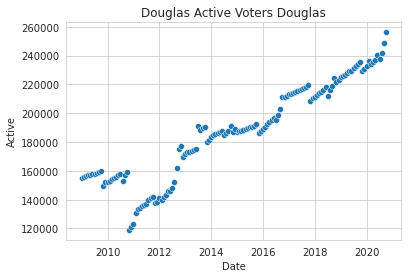

In [152]:
def gen_active_voter_chart(dfi, County = 'Douglas'):
    sns.set_style("whitegrid")
   
    
    df = dfi.copy(deep = True)
    by_county = df.groupby('County')
    cdf = by_county.get_group(County)
    by_year = cdf.groupby('Year')
    print(by_year)
    yr_lst = [d.year for d in cdf['Date']]
    
    g = sns.scatterplot(x = 'Date', y = 'Active', data = cdf)
    plt.title(County + " Active Voters " + County )
    #g.set_xticklabels(rotation=30)
    plt.show()
    return
gen_active_voter_chart(status_df)

In [153]:
!conda info

/usr/bin/sh: conda: command not found


In [141]:
County = 'Denver'
by_county = df.groupby('County')
cdf = by_county.get_group(County)
yr_lst = [d.year for d in cdf['Date']]
cdf['Date'] = pd.to_datetime(cdf['Date'])
cdf.dtypes

/home/jdreed/miniconda3/envs/msds696_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Date        datetime64[ns]
Active              object
Inactive            object
Total               object
dtype: object

In [ ]:
def gen_active_voter_by_county(dfi = status_df, County = 'Denver', Year = 2020):
    sns.set_style("whitegrid")
    df = dfi.copy(deep = True)
    by_county = df.groupby('County')
    cdf = by_county.get_group(County)
    
    yr_lst = [d.year for d in cdf['Date']]
    cdf['Year'] = yr_lst
    cdf['Date'] = pd.to_datetime(cdf['Date'])
    cdf = cdf.loc[cdf['Year'] == Year,:]
    g = sns.catplot(x = 'Date', y = 'Total', data = cdf, kind = 'bar')
    plt.title(County + " Active Voters by Month for " + str(Year))
    g.set_xticklabels(rotation=30)
    plt.show()
    return
gen_active_voter_chart(status_df, 'Broomfield', 2019)

In [2]:
import pickle
vr_status_df = pickle.load(open('/home/jdreed/MSDS696/data/processed/co-status.p', "rb"))
vr_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9115 entries, 0 to 9114
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       0 non-null      object
dtypes: object(1)
memory usage: 71.3+ KB


In [4]:
vr_status_df.shape
vr_status_df

,0
0,None
1,None
2,None
3,None
4,None
...,...
9110,None
9111,None
9112,None
9113,None


In [5]:
from datetime import date
print(f'Complete: {date.today()}')

Complete: 2020-11-24
